#📌 Extracción

In [22]:
import pandas as pd

# URL del archivo JSON en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar datos desde la URL
df = pd.read_json(url)

# Mostrar las primeras filas para verificar
print(df.shape)
df.head()

(7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

Explorar columnas y tipos de datos

In [23]:
# Ver informacion general del Dataframe
df.info()

# Ver tipos de datos
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


Comprobacion de incoherencias y de datos

In [24]:
# Conteo de valores nulos por columna
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [29]:
# Lista de columnas a aplanar
columnas_dict = ['customer', 'phone', 'internet', 'account']

for col in columnas_dict:
    # Expandimos los diccionarios a DataFrame
    expanded = pd.json_normalize(df[col])

    # Renombramos las columnas para evitar conflictos
    expanded.columns = [f"{col}.{subcol}" for subcol in expanded.columns]

    # Eliminamos la columna original y unimos la expandida
    df.drop(columns=[col], inplace=True)
    df = pd.concat([df, expanded], axis=1)

In [30]:
print(df.columns)
df.head()

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [31]:
# Duplicados por fila
df.duplicated().sum()

# Duplicados por customerID
df['customerID'].duplicated().sum()

np.int64(0)

In [27]:
# Buscar columnas que contengan valores tipo dict
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(f"La columna '{col}' contiene diccionarios.")

La columna 'customer' contiene diccionarios.
La columna 'phone' contiene diccionarios.
La columna 'internet' contiene diccionarios.
La columna 'account' contiene diccionarios.


Manejo de inconsistencias

In [33]:
# Normalizar todas las columnas tipo string
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.lower().str.strip()

In [34]:
cols_servicios = [
    'internet.onlineSecurity', 'internet.onlineBackup', 'internet.deviceProtection',
    'internet.techSupport', 'internet.streamingTV', 'internet.streamingMovies',
    'phone.multipleLines'
]

for col in cols_servicios:
    if col in df.columns:
        df[col] = df[col].replace({
            'no internet service': 'no',
            'no phone service': 'no'
        })

In [35]:
# Convertir cargos a numérico (puede que vengan como string)
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [39]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [40]:
df.dropna(subset=[
    'customerID', 'account.Charges.Monthly',
    'account.Charges.Total', 'Churn'
], inplace=True)

Eliminar duplicados

In [42]:
df.drop_duplicates(subset='customerID', inplace=True)

Validar limpieza

In [43]:
print("Valores nulos restantes:\n", df.isnull().sum())
print("Shape final:", df.shape)

Valores nulos restantes:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64
Shape final: (7256, 21)


# Columna de Cuentas Diarias

In [44]:
# Crear nueva columna con facturación diaria aproximada
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

In [45]:
df[['account.Charges.Monthly', 'Cuentas_Diarias']].head()

,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga y análisis

**Analisis Descriptivo General**

In [46]:
# Análisis estadístico para columnas numéricas
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213,2.158514
std,0.3693,24.558067,30.125739,2268.632997,1.004191
min,0.0000,1.000000,18.250000,18.800000,0.608333
25%,0.0000,9.000000,35.450000,400.225000,1.181667
50%,0.0000,29.000000,70.300000,1391.000000,2.343333
75%,0.0000,55.000000,89.900000,3785.300000,2.996667
max,1.0000,72.000000,118.750000,8684.800000,3.958333


**Análisis de columnas numéricas clave**

In [48]:
df[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']].describe()

,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7256.000000,7256.000000,7256.000000,7256.000000
mean,32.395535,64.755423,2280.634213,2.158514
std,24.558067,30.125739,2268.632997,1.004191
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.450000,400.225000,1.181667
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.900000,3785.300000,2.996667
max,72.000000,118.750000,8684.800000,3.958333


**Distribución de la variable objetivo (Churn)**

In [50]:
# Distribución de evasión
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
no,71.154906
yes,25.757993
,3.087100


**Recuento de evasion por variables categóricas**

In [54]:
def analizar_churn_por_variable(df, columna):
    cruzado = pd.crosstab(df[columna], df['Churn'], normalize='index') * 100
    return cruzado.sort_values(by='yes', ascending=False) if 'yes' in cruzado.columns else cruzado


columnas_categoricas = [
    'customer.gender',
    'account.Contract',
    'account.PaymentMethod',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'internet.InternetService',
    'internet.TechSupport',
    'internet.OnlineSecurity',
    'phone.MultipleLines'
]

# Distribución de churn por tipo de contrato
analizar_churn_por_variable(df, 'account.Contract')

Churn,,no,yes
account.Contract,,,
month-to-month,3.245943,55.430712,41.323346
one year,3.030303,86.034256,10.935441
two year,2.769763,94.460473,2.769763


In [56]:
for col in columnas_categoricas:
    print(f"{col.upper()}")
    display(analizar_churn_por_variable(df, col))
    print("\n")

CUSTOMER.GENDER


Churn,,no,yes
customer.gender,,,
female,2.899359,70.922777,26.177865
male,3.270646,71.381848,25.347506




ACCOUNT.CONTRACT


Churn,,no,yes
account.Contract,,,
month-to-month,3.245943,55.430712,41.323346
one year,3.030303,86.034256,10.935441
two year,2.769763,94.460473,2.769763




ACCOUNT.PAYMENTMETHOD


Churn,,no,yes
account.PaymentMethod,,,
electronic check,3.271984,52.924335,43.803681
mailed check,3.198552,78.213639,18.587809
bank transfer (automatic),2.835539,80.907372,16.257089
credit card (automatic),2.935546,82.259094,14.805361




CUSTOMER.SENIORCITIZEN


Churn,,no,yes
customer.SeniorCitizen,,,
1,3.384095,56.345178,40.270728
0,3.029305,74.036878,22.933816




CUSTOMER.PARTNER


Churn,,no,yes
customer.Partner,,,
no,2.882306,65.092074,32.025620
yes,3.305785,77.628954,19.065261




CUSTOMER.DEPENDENTS


Churn,,no,yes
customer.Dependents,,,
no,3.008258,66.653559,30.338183
yes,3.271889,81.705069,15.023041




INTERNET.INTERNETSERVICE


Churn,,no,yes
internet.InternetService,,,
fiber optic,3.189493,56.253909,40.556598
dsl,2.698349,78.815948,18.485703
no,3.492063,89.333333,7.174603




INTERNET.TECHSUPPORT


Churn,,no,yes
internet.TechSupport,,,
no,3.043843,56.576375,40.379782
yes,2.857143,82.380952,14.761905
no internet service,3.492063,89.333333,7.174603




INTERNET.ONLINESECURITY


Churn,,no,yes
internet.OnlineSecurity,,,
no,3.049626,56.445800,40.504574
yes,2.844744,82.931533,14.223722
no internet service,3.492063,89.333333,7.174603




PHONE.MULTIPLELINES


Churn,,no,yes
phone.MultipleLines,,,
yes,3.070892,69.160405,27.768703
no,3.008596,72.664756,24.326648
no phone service,3.546099,72.340426,24.113475


**Conteo de evasion por variables numéricas**

/tmp/ipython-input-2971304245.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette='Set2')


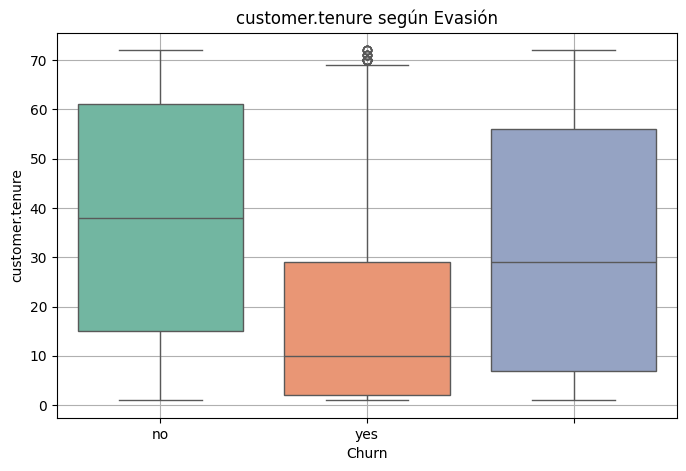

/tmp/ipython-input-2971304245.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette='Set2')


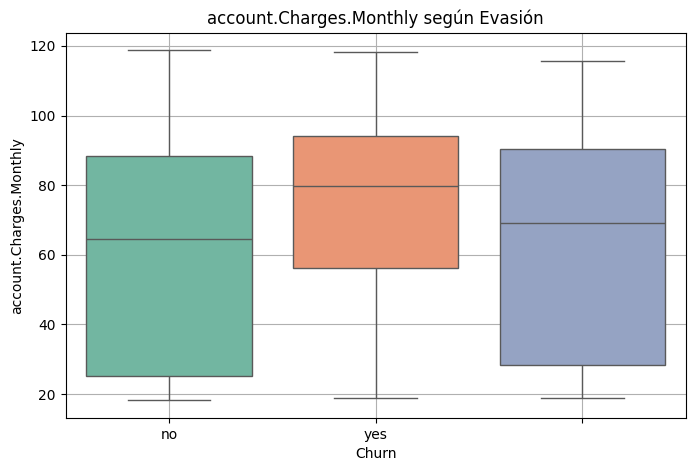

/tmp/ipython-input-2971304245.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette='Set2')


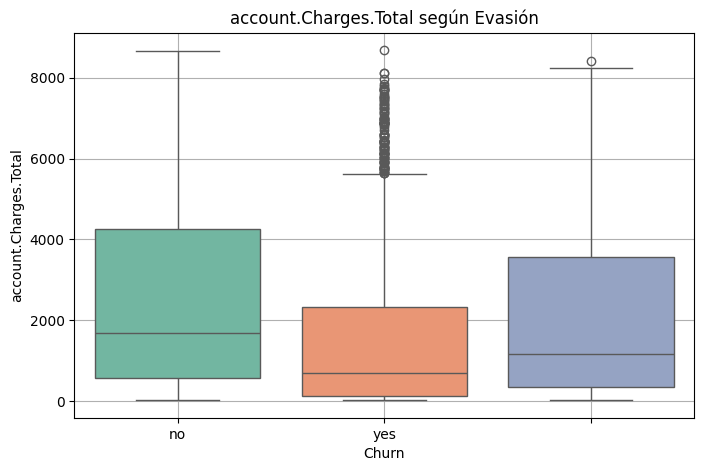

/tmp/ipython-input-2971304245.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette='Set2')


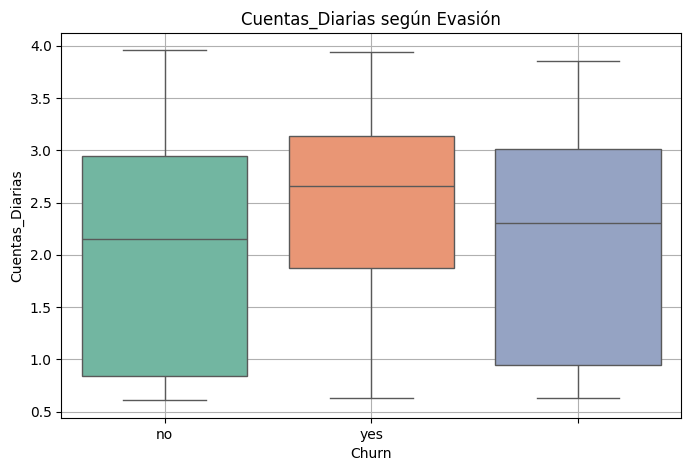

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_numericas = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'Cuentas_Diarias'
]

# Crear gráficos tipo boxplot por variable
for var in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Churn', y=var, palette='Set2')
    plt.title(f'{var} según Evasión')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

**Estadistica separadas por grupos**

In [59]:
# Resumen estadístico por grupo
df.groupby('Churn')[variables_numericas].describe()

customer.tenure                                                     \
                count       mean        std  min   25%   50%   75%   max   
Churn                                                                      
                224.0  31.571429  24.998552  1.0   7.0  29.0  56.0  72.0   
no             5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0   
yes            1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      account.Charges.Monthly             ... account.Charges.Total           \
                        count       mean  ...                   75%      max   
Churn                                     ...                                  
                        224.0  63.412277  ...             3562.8625  8425.30   
no                     5163.0  61.307408  ...             4264.1250  8672.45   
yes                    1869.0  74.441332  ...             2331.3000  8684.80   

      Cuentas_Diarias                                                    \
                count      mean       std       min       25%       50%   
Churn                                                                     
                224.0  2.113743  1.046290  0.625000  0.947500  2.303333   
no             5163.0  2.043580  1.036485  0.608333  0.836667  2.148333   
yes            1869.0  2.481378  0.822202  0.628333  1.871667  2.655000   

                           
            75%       max  
Churn                      
       3.013750  3.851667  
no     2.949167  3.958333  
yes    3.140000  3.945000  

[3 rows x 32 columns]

#📄Informe final

# 📊 Informe Final - Entendiendo la Evasión de Clientes en Telecom X

---

## 🔹 Introducción

En el mundo de las telecomunicaciones, **conservar a los clientes** puede ser tan desafiante como atraer nuevos. Este análisis se centró en entender mejor **por qué algunos clientes de Telecom X deciden cancelar sus servicios**.

A partir de una base de datos detallada que incluye información demográfica, tipo de contrato y comportamiento de uso, buscamos identificar patrones que nos permitan anticipar la evasión y tomar decisiones más informadas.

---

## 🔹 Limpieza y Preparación de los Datos

Antes de sacar conclusiones, fue fundamental asegurarnos de que los datos estuvieran en condiciones óptimas. Estos fueron los principales pasos que realizamos:

- Cargamos la información desde una fuente JSON externa.
- Reorganizamos y “aplanamos” las columnas que venían agrupadas como diccionarios (por ejemplo: información del cliente, del contrato, etc.).
- Convertimos los campos de facturación a formatos numéricos adecuados.
- Eliminamos filas duplicadas y valores vacíos en campos críticos.
- Unificamos el formato de texto en las variables categóricas (minúsculas, sin espacios).
- Creamos una nueva variable llamada **`Cuentas_Diarias`**, que estima cuánto gasta un cliente por día, usando como base la facturación mensual.

---

## 🔹 Exploración de los Datos

### 📌 ¿Qué nos dicen los números?

- En general, los clientes que abandonan el servicio han tenido **menos tiempo de contrato** y han gastado **menos en total** que aquellos que permanecen.
- La mayoría de los que cancelan tienen contratos de tipo **mensual**, lo que sugiere que la flexibilidad puede estar relacionada con una menor fidelización.
- Además, se detectó que **no tener servicios adicionales**, como seguridad en línea o soporte técnico, se asocia con una mayor tasa de evasión.

### 📈 ¿Qué vimos en las visualizaciones?

- A través de **boxplots** y análisis cruzados, pudimos comparar cómo varían variables como `tenure`, `Charges.Monthly`, `Charges.Total` y `Cuentas_Diarias` entre los que cancelan y los que no.
- El resultado fue claro: los clientes que permanecen, en promedio, **gastan más y duran más** tiempo conectados con la empresa.

---

## 🔹 Lo que descubrimos

- El **tipo de contrato** es uno de los factores más importantes: los contratos mensuales presentan una mayor tasa de cancelación.
- Las personas que no cuentan con ciertos servicios opcionales también tienen una mayor probabilidad de irse.
- Los métodos de pago electrónicos (como el débito directo) también mostraron una mayor proporción de cancelación.

---

## 🔹 ¿Qué recomendamos?

1. 💡 **Fomentar contratos más largos**, con beneficios o descuentos por fidelidad.
2. 🛠️ **Incluir servicios de soporte y seguridad** como parte de paquetes base, para mejorar la percepción de valor.
3. 📅 **Prestar atención especial a los primeros meses** de cada cliente, que parecen ser críticos.
4. 🚨 **Establecer alertas internas** para detectar comportamientos de riesgo (como bajo gasto, uso mínimo de servicios, etc.).
5. 🎯 **Personalizar estrategias de retención** según el perfil del cliente y su historial de consumo.

---

## ✅ Reflexión final

Este análisis no solo nos ayuda a entender qué clientes se van, sino sobre todo **por qué se van**. Con estos aprendizajes, Telecom X tiene en sus manos la oportunidad de **reducir significativamente la evasión**, mejorar la experiencia del usuario y fortalecer la lealtad a largo plazo.